# 1A See Handwritten Notes

# 1B

In [109]:

import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['figure.figsize'] = [12,8]

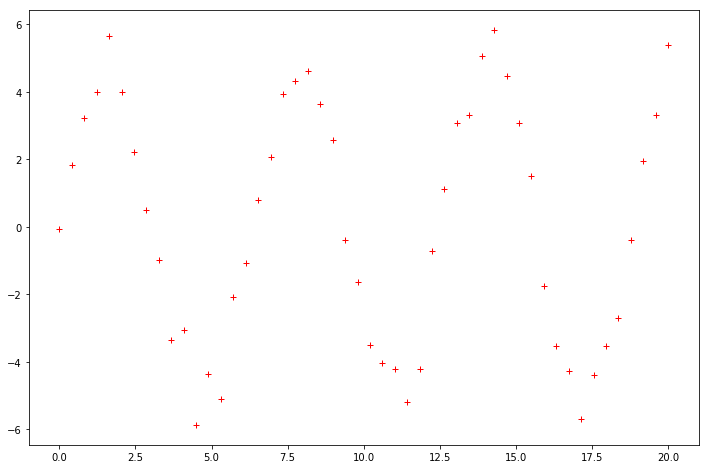

In [110]:
# sine wave with noise, aka swell with wind chop
arr = np.linspace(0, 20, 50)
ts = np.sin(arr) * 5 + np.random.uniform(-1, 1, len(arr))
plt.plot(arr, ts, 'r+')
plt.show()


0.9996401024440149


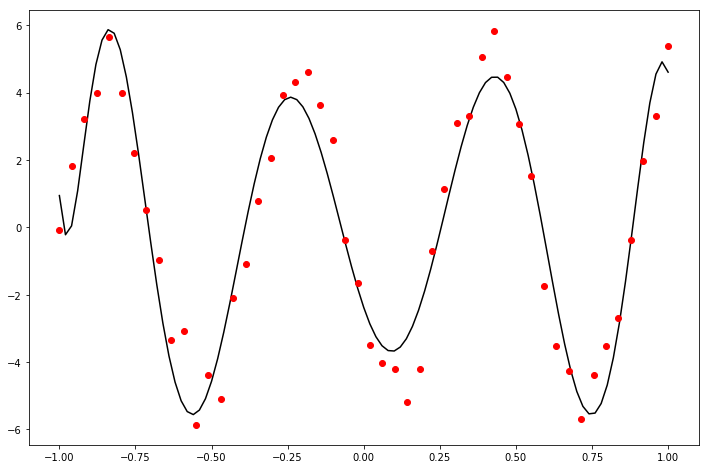

In [111]:
data = pd.DataFrame(data={'Time': arr, 'Wave Height': ts})
x = data['Time'].as_matrix().astype(float)
y = data['Wave Height'].as_matrix().astype(float)

X = np.column_stack([np.ones_like(x),x])
w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))

xhat = np.linspace(x.min(),x.max(),101)
Xhat = np.column_stack([np.ones_like(xhat),xhat])
yhat = np.dot(Xhat,w)

x_tilde = 2*(x - x.min())/(x.max()-x.min()) - 1
xhat = 2*(xhat - x.min())/(x.max()-x.min()) - 1

x = x_tilde

degree = 10

X = np.vander(x,degree+1,increasing=True)

gamma = 1e-4
Eye = np.eye(X.shape[1])
Eye[0,0] = 0

w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))

Xhat = np.vander(xhat,degree+1,increasing=True)
yhat = np.dot(Xhat,w)

avg_rmse = np.sqrt(np.sum((np.dot(X,w) - y)**2)/len(y))
print(avg_rmse)
plt.plot(xhat,yhat,'k-')
plt.plot(x,y,'ro')
plt.show()

## 1C

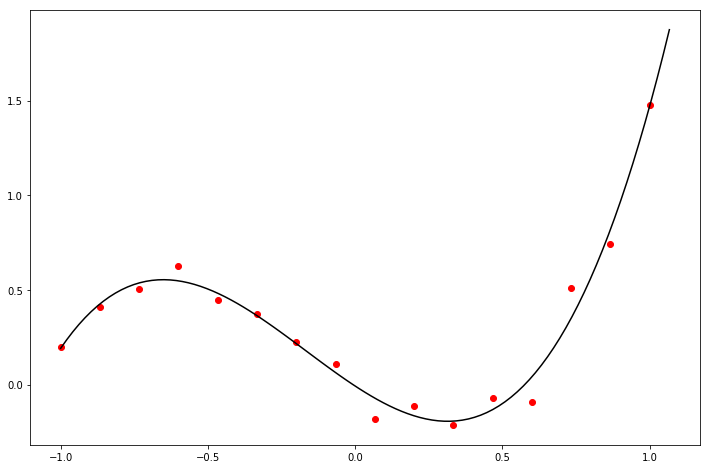

In [112]:
test_path = 'PC1_test.csv'
training_path = 'PC1_training.csv'

degree = 3

test_series = pd.read_csv(test_path, names=['Test'])
training_series = pd.read_csv(training_path, names=['Training'])
y = training_series['Training'].values
x = training_series['Training'].index

x_tilde = 2*(x - x.min())/(x.max()-x.min()) - 1
xhat = 2*(xhat - x.min())/(x.max()-x.min()) - 1

x = x_tilde

X = np.vander(x, degree+1, increasing=True)

gamma = 1e-4
Eye = np.eye(X.shape[1])
Eye[0,0] = 0

w = np.linalg.solve(np.dot(X.T,X) + gamma*Eye, np.dot(X.T,y))

Xhat = np.vander(xhat,degree+1,increasing=True)
yhat = np.dot(Xhat, w)


avg_rmse = np.sqrt(np.sum((np.dot(X,w) - y)**2)/len(y))

plt.plot(x,y,'ro')
plt.plot(xhat,yhat,'k-')
plt.show()

# 1D

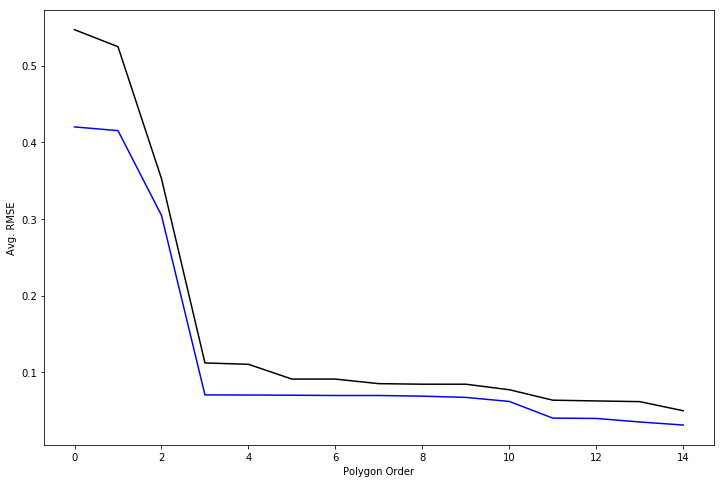

In [123]:

training_rmse = []
for degree in range(0, 15):
    X = np.vander(x, degree+1, increasing=True)
    w = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))
    Xhat = np.vander(xhat,degree+1,increasing=True)
    yhat = np.dot(Xhat, w)
    avg_rmse = np.sqrt(np.sum((np.dot(X,w) - y)**2)/len(y))
    training_rmse.append(avg_rmse)

    
yt = test_series['Test'].values
xt = test_series['Test'].index    

test_rmse = []
for degree in range(0, 15):
    X = np.vander(x, degree+1, increasing=True)
    w = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,yt))
    Xhat = np.vander(xhat,degree+1,increasing=True)
    yhat = np.dot(Xhat, w)
    avg_rmse = np.sqrt(np.sum((np.dot(X,w) - yt)**2)/len(yt))
    test_rmse.append(avg_rmse)

rmse_hat = [x for x in range(0, 15)]

plt.ylabel('Avg. RMSE')
plt.xlabel('Polygon Order')
plt.plot(rmse_hat, test_rmse, 'k-')
plt.plot(rmse_hat, training_rmse, 'b-')
plt.show()

In both training and test, I get large reductions from 0th order to 3rd order polynomial, after which
returns diminish for added terms.

# 1E

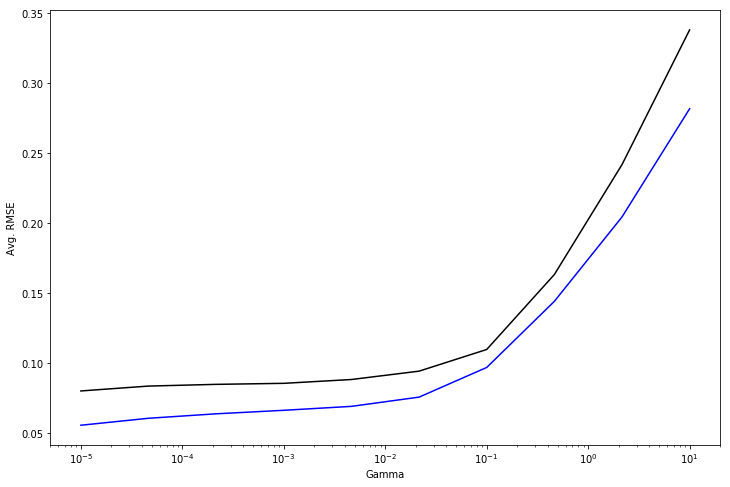

In [122]:
degree = 15

gamma_arr = [x for x in np.logspace(-5, 1, 10)]

training_rmse = []
for gamma in np.logspace(-5, 1, 10):
    X = np.vander(x, degree+1, increasing=True)
    Eye = np.eye(X.shape[1])
    Eye[0,0] = 0
    w = np.linalg.solve(np.dot(X.T,X) + gamma*Eye,np.dot(X.T,y))
    avg_rmse = np.sqrt(np.sum((np.dot(X,w) - y)**2)/len(y))
    training_rmse.append(avg_rmse)
    
test_rmse = []
for gamma in np.logspace(-5, 1, 10):
    X = np.vander(xt, degree+1, increasing=True)
    Eye = np.eye(X.shape[1])
    Eye[0,0] = 0
    w = np.linalg.solve(np.dot(X.T,X) + gamma*Eye,np.dot(X.T,yt))
    avg_rmse = np.sqrt(np.sum((np.dot(X,w) - yt)**2)/len(yt))
    test_rmse.append(avg_rmse)

plt.ylabel('Avg. RMSE')
plt.xlabel('Gamma')
plt.semilogx(gamma_arr, training_rmse, 'b-')
plt.semilogx(gamma_arr, test_rmse, 'k-')
plt.show()

# 1F

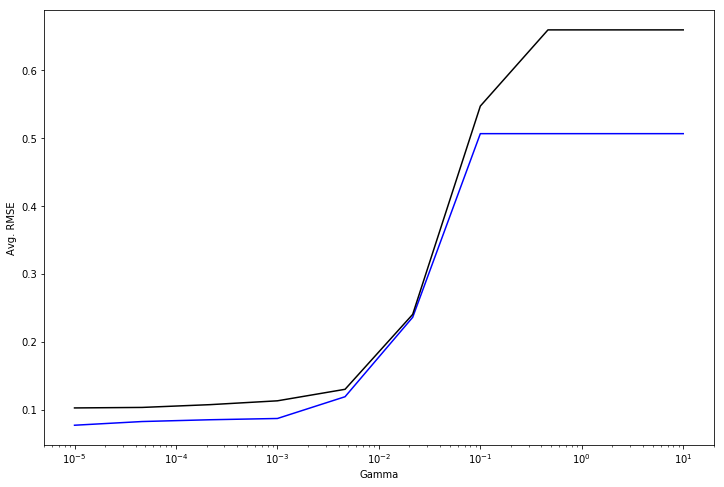

In [128]:
from sklearn import linear_model

N = 11
degree = 15

gamma_arr = [x for x in np.logspace(-5, 1, 10)]

training_rmse = []
for gamma in np.logspace(-5, 1, 10):
    X = np.vander(x,degree)[:,1:]
    lasso = linear_model.Lasso(alpha=gamma,max_iter=100000)
    lasso.fit(X,y)
    rmse = np.sqrt(np.sum((lasso.predict(X) - y)**2)/N)
    training_rmse.append(rmse)

test_rmse = []
for gamma in np.logspace(-5, 1, 10):
    X = np.vander(xt,degree)[:,1:]
    lasso = linear_model.Lasso(alpha=gamma,max_iter=100000)
    lasso.fit(X,yt)
    rmse = np.sqrt(np.sum((lasso.predict(X) - yt)**2)/N)
    test_rmse.append(rmse)
    
plt.ylabel('Avg. RMSE')
plt.xlabel('Gamma')
plt.semilogx(gamma_arr, training_rmse, 'b-')
plt.semilogx(gamma_arr, test_rmse, 'k-')
plt.show()

I found that LASSO (blue) performs slightly better, though both perform better with gamma about 1e-2 and below.

# 1G

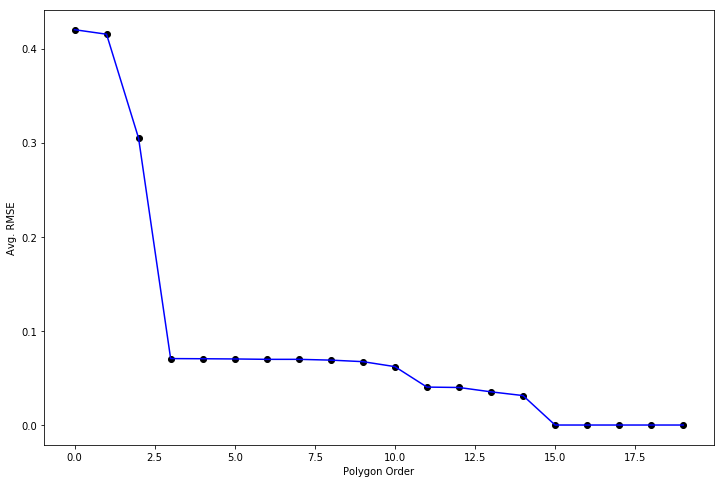

In [134]:
import numpy.polynomial.legendre as leg

training_rmse = []
for degree in range(0, 20):
    X = np.vander(x, degree+1, increasing=True)
    w = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))
    Xhat = np.vander(xhat,degree+1,increasing=True)
    yhat = np.dot(Xhat, w)
    avg_rmse = np.sqrt(np.sum((np.dot(X,w) - y)**2)/len(y))
    training_rmse.append(avg_rmse)
    
legendre_rmse = []
for degree in range(0, 20):
    X = leg.legvander(x,degree)
    w = np.linalg.solve(np.dot(X.T,X),np.dot(X.T,y))
    avg_rmse = np.sqrt(np.sum((np.dot(X,w) - y)**2)/len(y))
    legendre_rmse.append(avg_rmse)  

rmse_hat = [x for x in range(0, 20)]
plt.ylabel('Avg. RMSE')
plt.xlabel('Polygon Order')
plt.plot(rmse_hat, legendre_rmse, 'ko')
plt.plot(rmse_hat, training_rmse, 'b-')
plt.show()

I think python 3 uses high enough float precision to not run into the high-order divergence expected
from Python 2.

# 3A

Can ignore denominator because probability of a class is proportional to numerator, and the denominator is the same for each class, so the classifier can just choose the class with the highest valued numerator without normalizing each case.


# 3B

In [ ]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split

digits = load_digits()
X = np.round(digits.data / 16.)
y_classed = digits.target
target_arr = digits.target_names

X, X_test, y, y_test = train_test_split(X, y_classed, test_size=0.33,
                                        random_state=42)

m = X.shape[0]
n = X.shape[1]
N = target_arr.shape[0]
m_test = X_test.shape[1]

train_acc = 0.90
# feature_select window from [1:2] running accross feature space at various widths to [62:63]
list_ = [x for x in range(1, n)]
_list = list_
for start in _list:
    for stop in list_:

        n = abs(stop - start)
        X_mod = X[:, start: stop]
        theta = np.zeros((n, N))
        if X_mod.shape[1] > 1:
            for k in range(N):
                theta[:, k] = np.sum(X_mod[y == k], axis=0) / len(X_mod[y == k])

            unique, counts = np.unique(y, return_counts=True)
            priors = np.array([x / np.sum(counts) for x in counts])

            class_probs = np.zeros((m, N))

            for i, x in enumerate(X_mod):
                for k in range(N):
                    prior = priors[k]
                    lklhd = np.prod(theta[:, k] ** x * (1 - theta[:, k]) ** (1 - x))
                    pstrr_k = prior * lklhd
                    class_probs[i, k] = pstrr_k

            class_probs /= np.sum(class_probs, axis=1, keepdims=True)
            y_pred_train = np.argmax(class_probs, axis=1)
            cm_train = confusion_matrix(y_pred_train, y)

            # print(cm_train)

            # print(r)
            train_accuracy = accuracy_score(y, y_pred_train)
            if train_accuracy > train_acc:
                print('training accuracy: {}, trying to beat 0.913549459684123'.format(
                    train_accuracy))
                window = start, stop
                train_acc = train_accuracy
                results = {'accuracy': train_acc, 'feature_array': window}

            X_test_mod = X_test[:, start: stop]
            mm = X_test_mod.shape[0]
            class_probs_test = np.zeros((mm, N))

            for i, xt in enumerate(X_test_mod):
                for k in range(N):
                    prior = priors[k]
                    lklhd = np.prod(theta[:, k] ** xt * (1 - theta[:, k]) ** (1 - xt))
                    pstrr_k = prior * lklhd
                    class_probs_test[i, k] = pstrr_k

            class_probs_test /= np.sum(class_probs_test, axis=1, keepdims=True)
            y_pred_test = np.argmax(class_probs_test, axis=1)
            cm_test = confusion_matrix(y_pred_test, y_test)

            test_accuracy = accuracy_score(y_test, y_pred_test)
            if test_accuracy >= train_acc:
                print('test accuracy: {}'.format(
                    test_accuracy))
                test_acc = test_accuracy
                results['test_accuracy'] = test_acc
                print('test run confusion matrix:\n{}'.format(cm_test))
                print(results)


I did this in PyCharm and got:

In [ ]:
training accuracy: 0.914380714879468, trying to beat 0.913549459684123
test accuracy: 0.8872053872053872
test run confusion matrix:
[[52  0  0  0  0  2  0  1  0  0]
 [ 0 40  4  0  0  0  0  0  1  0]
 [ 0  3 46  2  0  0  0  1  0  0]
 [ 0  0  0 45  0  0  0  0  0  3]
 [ 2  1  0  0 63  1  0  0  0  0]
 [ 1  0  0  0  0 61  1  1  1  1]
 [ 0  0  0  0  0  0 55  0  0  0]
 [ 0  0  0  1  1  0  0 58  0  4]
 [ 0  6  2  3  0  0  1  0 49  2]
 [ 0  5  0  5  0  9  0  1  1 58]]
{'accuracy': 0.914380714879468, 'feature_array': (5, 63), 'test_accuracy': 0.8872053872053872}


This will take a while to run a loop choosing different index windows to pull from the 64 features, and will chose the features `[5: 63]` and up the training accuracy to about 0.9144, test accuracy about 0.887 which is the highest I could get with Naive Bayes running a window over adjacent features.  Though of course they're not adjacent,  I also selected the center 8x6 of the pictures, but had my algorithm messed up at that time and didn't go back.